<a href="https://colab.research.google.com/github/lanyu0322/pedestrian_firstdraft_figures/blob/master/figure3_and__figure4_wamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
from scipy.optimize import least_squares
from scipy.ndimage.filters import uniform_filter as uf

# -- install geopandas
try:
  import geopandas as gp

except:
  !pip install geopandas

In [ ]:
# -- read in the parameters from 4 pop fit
fname = os.path.join("drive", "My Drive", "lwir", "data", "4_pop_fit", 
                     "4pop_para.csv")
parr = pd.read_csv(fname)

 # -- convert means and widths to hours                           
cname = ["m1", "m2", "m3", "sd1", "sd2", "sd3"]                                        
parr[cname] *= 0.25


# -- read in the weekday counts
camera_fname = os.path.join("drive", "My Drive", "lwir", "data", "nycdot", 
                            "cams_ft_wd.feather")
camera = pd.read_feather(camera_fname)

In [ ]:
# -- sub-select Manhattan
bpath = os.path.join("drive", "My Drive", "lwir", "data", "boro_boundaries")
bname = "Borough Boundaries.geojson"
boros = gp.read_file(os.path.join(bpath, bname))
boros = boros[boros.boro_name == "Manhattan"]

# -- set the parks geometries file name
dpath = os.path.join("drive", "My Drive", "lwir", "data", "parks", "properties")
fname = "geo_export_5b605687-0f81-4fe4-9fb7-ec27cd43ab5f.shp"

# -- load the parks geometries and convert to NY State Plane
parks = gp.read_file(os.path.join(dpath, fname))
parks_m = parks[parks.borough == "M"]

No handles with labels found to put in legend.


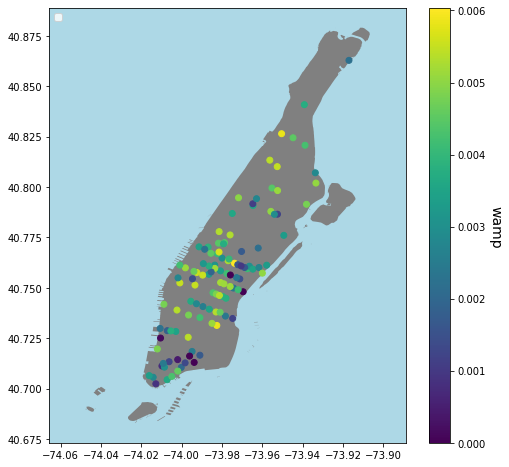

In [ ]:
# -- create a wamp plot of 4 population fit 
fig, ax = plt.subplots(figsize=[8, 8])
boros.plot(color="grey", ax=ax, legend=True)
#parks_m.plot(color="orange", ax=ax, legend=True)
sc = ax.scatter(parr["lon"], parr["lat"], c=parr["wamp"])
fig.colorbar(mappable=sc, ax=ax)
ax.legend(loc='upper left')
ax.set_facecolor("lightblue")
ax.axis("equal")
#ax.set_title("wamp of 4 population fit")
fig.text(0.9, 0.5, "wamp", ha="center", 
         va="center", rotation=-90, fontsize=14)

outfile = os.path.join("drive", "My Drive", "lwir", "output", "figure4",
                       "wamp of 4 population fit.png")
fig.savefig(outfile)


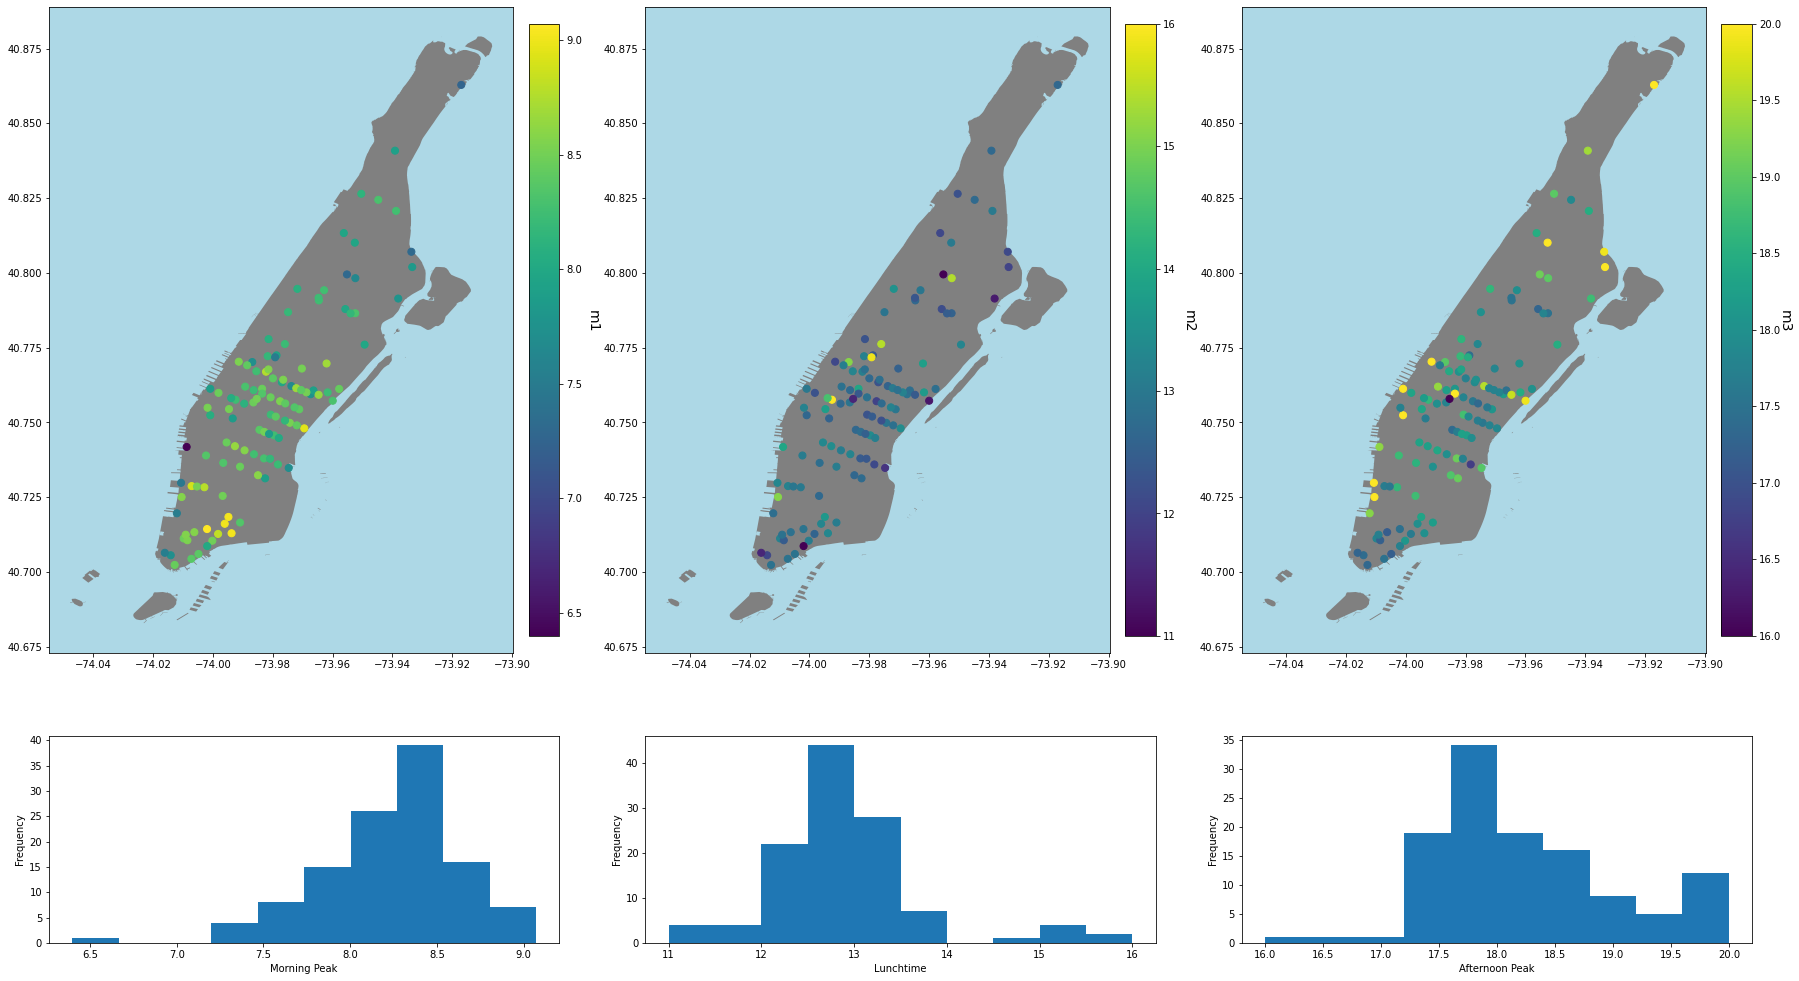

<Figure size 432x288 with 0 Axes>

In [ ]:
# -- plot first 3 parameters(mean) of 4 population fit

fig, axs = plt.subplots(2, 3, figsize=(25, 15), gridspec_kw={
                           'height_ratios': [4, 1]})
cols = parr.columns

for row in range(2):
  for col in range(3):
    i = col
    ax = axs[row, col]
    if (row == 0):
      boros.plot(color="grey", ax=ax)
      ax.set_facecolor("lightblue")
      sc = ax.scatter(parr["lon"], parr["lat"], s=50, c=parr[cols[i]])
      fig.colorbar(mappable=sc, ax=ax, fraction=0.06, pad=0.03)
      if (row == 0 and col == 0):
        ax.text(1.17, 0.5, "m1", size=14 , ha="center", rotation=-90, transform=ax.transAxes)   
      if (row == 0 and col == 1):
        ax.text(1.17, 0.5, "m2", size=14, ha="center", rotation=-90, transform=ax.transAxes)    
      if (row == 0 and col == 2):
        ax.text(1.17, 0.5, "m3", size=14, ha="center", rotation=-90, transform=ax.transAxes)
    if (row == 1 and col == 0):
      ax.hist(parr[cols[i]], bins=10)
      ax.set_xlabel("Morning Peak")
      ax.set_ylabel("Frequency")
    if (row == 1 and col == 1):
      ax.hist(parr[cols[i]], bins=10)
      ax.set_xlabel("Lunchtime")
      ax.set_ylabel("Frequency")
    if (row == 1 and col == 2):
      ax.hist(parr[cols[i]], bins=10)
      ax.set_xlabel("Afternoon Peak")
      ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()
rawfile = os.path.join("drive", "My Drive", "lwir", "output","figure3", "m1m2m3")
plt.savefig(rawfile)

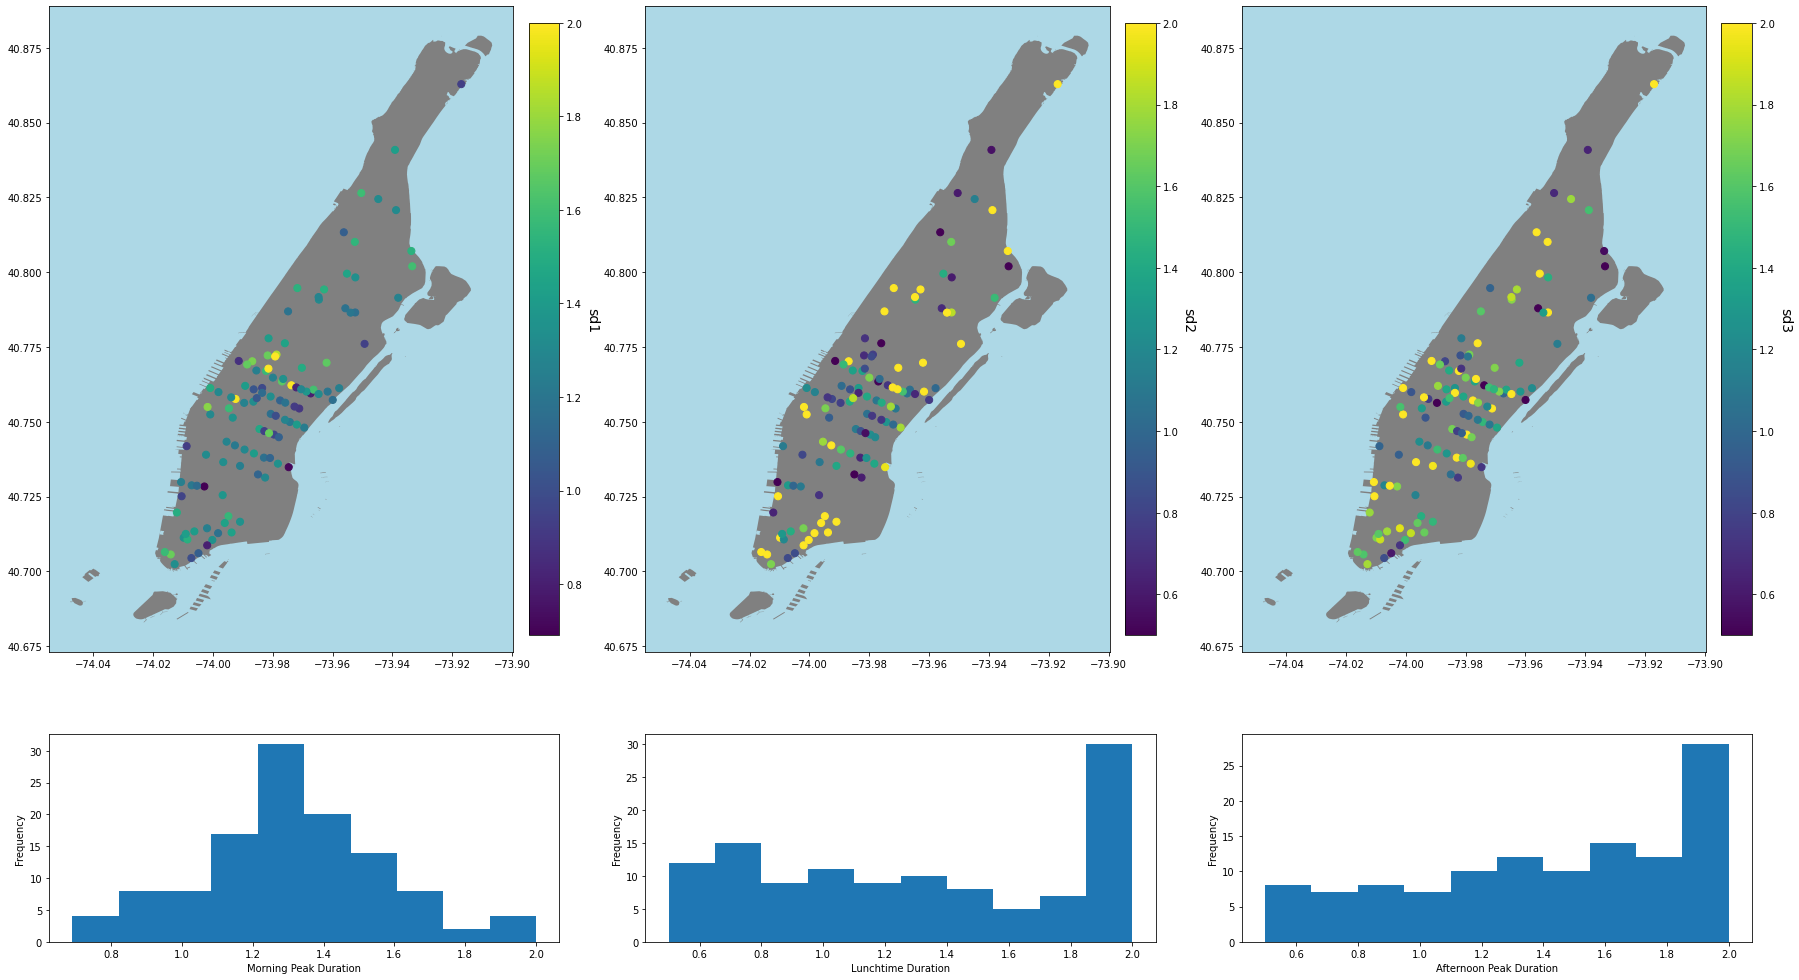

<Figure size 432x288 with 0 Axes>

In [ ]:
# -- plot 2nd 3 parameters(std) of 4 population fit
fig, axs = plt.subplots(2, 3, figsize=(25, 15), gridspec_kw={
                           'height_ratios': [4, 1]})
cols = parr.columns

for row in range(2):
  for col in range(3):
    i = col
    ax = axs[row, col]
    if (row == 0):
      boros.plot(color="grey", ax=ax)
      ax.set_facecolor("lightblue")
      sc = ax.scatter(parr["lon"], parr["lat"], s=50, c=parr[cols[i+3]])
      fig.colorbar(mappable=sc, ax=ax, fraction=0.06, pad=0.03)
      if (row == 0 and col == 0):
        ax.text(1.17, 0.5, "sd1", size=14, ha="center", rotation=-90, transform=ax.transAxes)   
      if (row == 0 and col == 1):
        ax.text(1.17, 0.5, "sd2", size=14, ha="center", rotation=-90, transform=ax.transAxes)    
      if (row == 0 and col == 2):
        ax.text(1.17, 0.5, "sd3", size=14, ha="center", rotation=-90, transform=ax.transAxes)
    if (row == 1 and col == 0):
      ax.hist(parr[cols[i+3]], bins=10)
      ax.set_xlabel("Morning Peak Duration")
      ax.set_ylabel("Frequency")
    if (row == 1 and col == 1):
      ax.hist(parr[cols[i+3]], bins=10)
      ax.set_xlabel("Lunchtime Duration")
      ax.set_ylabel("Frequency")
    if (row == 1 and col == 2):
      ax.hist(parr[cols[i+3]], bins=10)
      ax.set_xlabel("Afternoon Peak Duration")
      ax.set_ylabel("Frequency")


plt.tight_layout()
plt.show()
rawfile = os.path.join("drive", "My Drive", "lwir", "output","figure3", "sd1sd2sd3")
plt.savefig(rawfile)

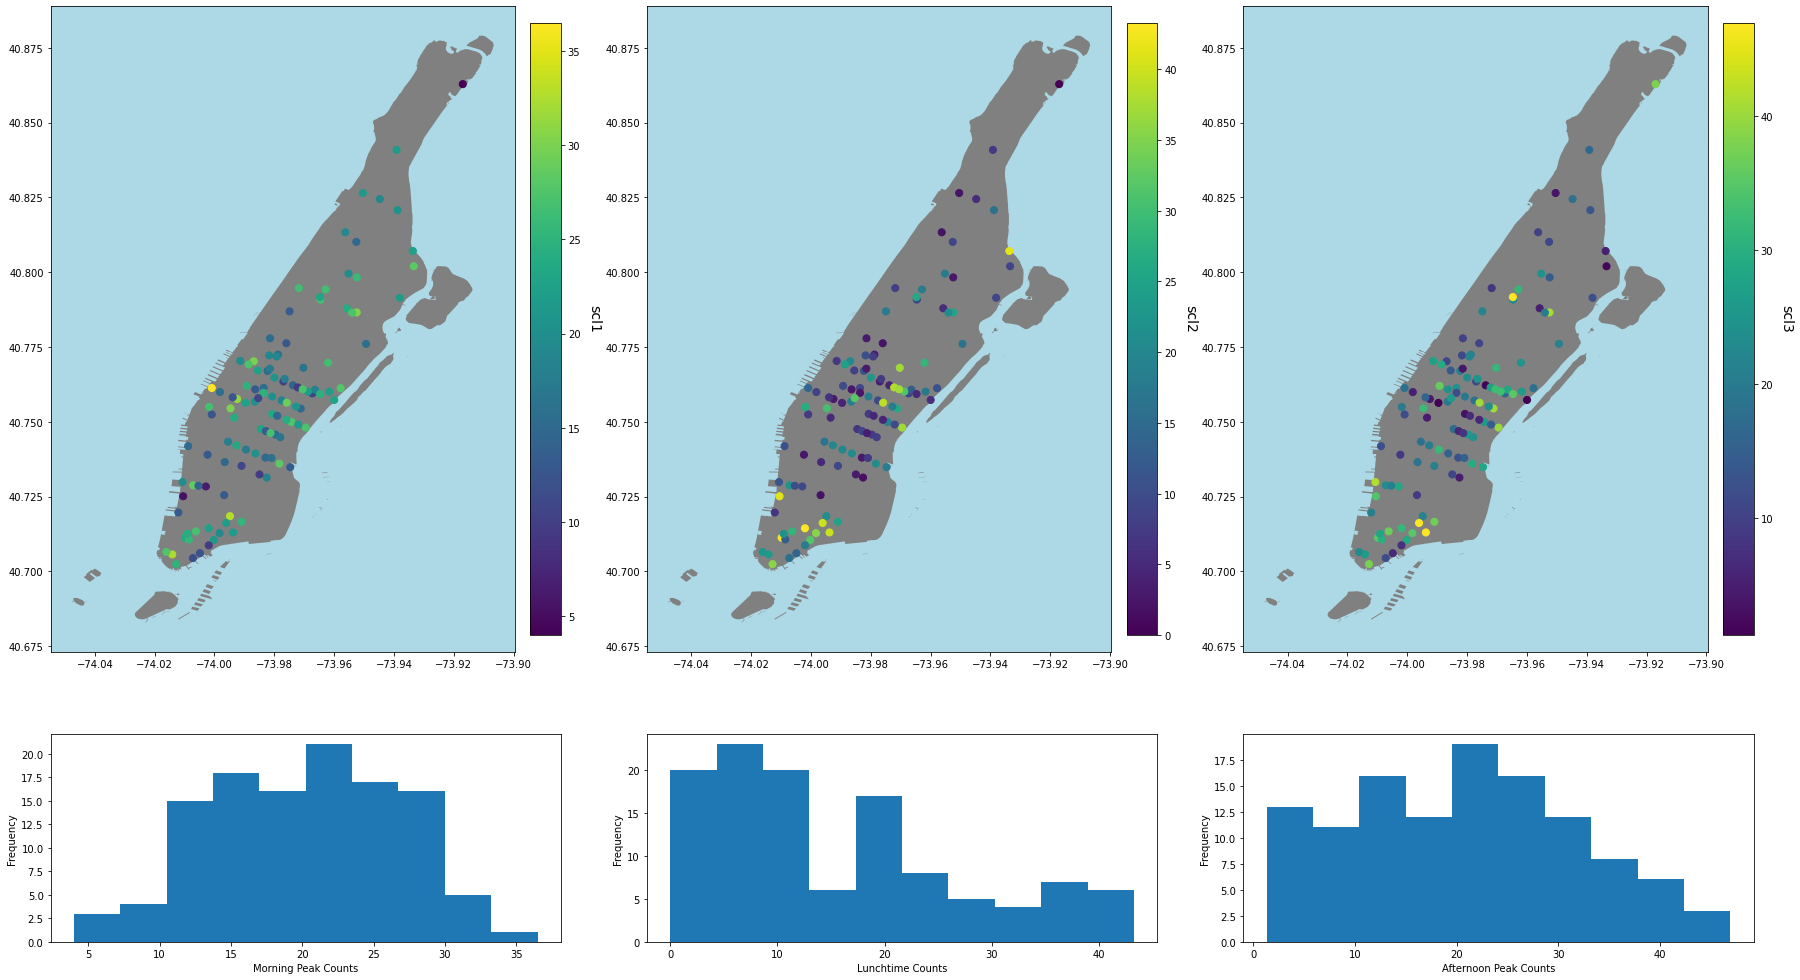

<Figure size 432x288 with 0 Axes>

In [ ]:
# -- plot 3rd 3 parameters(scl) of 4 population fit
fig, axs = plt.subplots(2, 3, figsize=(25, 15), gridspec_kw={
                           'height_ratios': [4, 1]})
cols = parr.columns

for row in range(2):
  for col in range(3):
    i = col
    ax = axs[row, col]
    if (row == 0):
      boros.plot(color="grey", ax=ax)
      ax.set_facecolor("lightblue")
      sc = ax.scatter(parr["lon"], parr["lat"], s=50, c=parr[cols[i+6]])
      fig.colorbar(mappable=sc, ax=ax, fraction=0.06, pad=0.03)
      if (row == 0 and col == 0):
        ax.text(1.17, 0.5, "scl1", size=14, ha="center", rotation=-90, transform=ax.transAxes)   
      if (row == 0 and col == 1):
        ax.text(1.17, 0.5, "scl2", size=14, ha="center", rotation=-90, transform=ax.transAxes)    
      if (row == 0 and col == 2):
        ax.text(1.17, 0.5, "scl3", size=14, ha="center", rotation=-90, transform=ax.transAxes)
    if (row == 1 and col == 0):
      ax.hist(parr[cols[i+6]], bins=10)
      ax.set_xlabel("Morning Peak Counts")
      ax.set_ylabel("Frequency")
    if (row == 1 and col == 1):
      ax.hist(parr[cols[i+6]], bins=10)
      ax.set_xlabel("Lunchtime Counts")
      ax.set_ylabel("Frequency")
    if (row == 1 and col == 2):
      ax.hist(parr[cols[i+6]], bins=10)
      ax.set_xlabel("Afternoon Peak Counts")
      ax.set_ylabel("Frequency")


plt.tight_layout()
plt.show()
rawfile = os.path.join("drive", "My Drive", "lwir", "output","figure3", "scl1scl2scl3")
plt.savefig(rawfile)

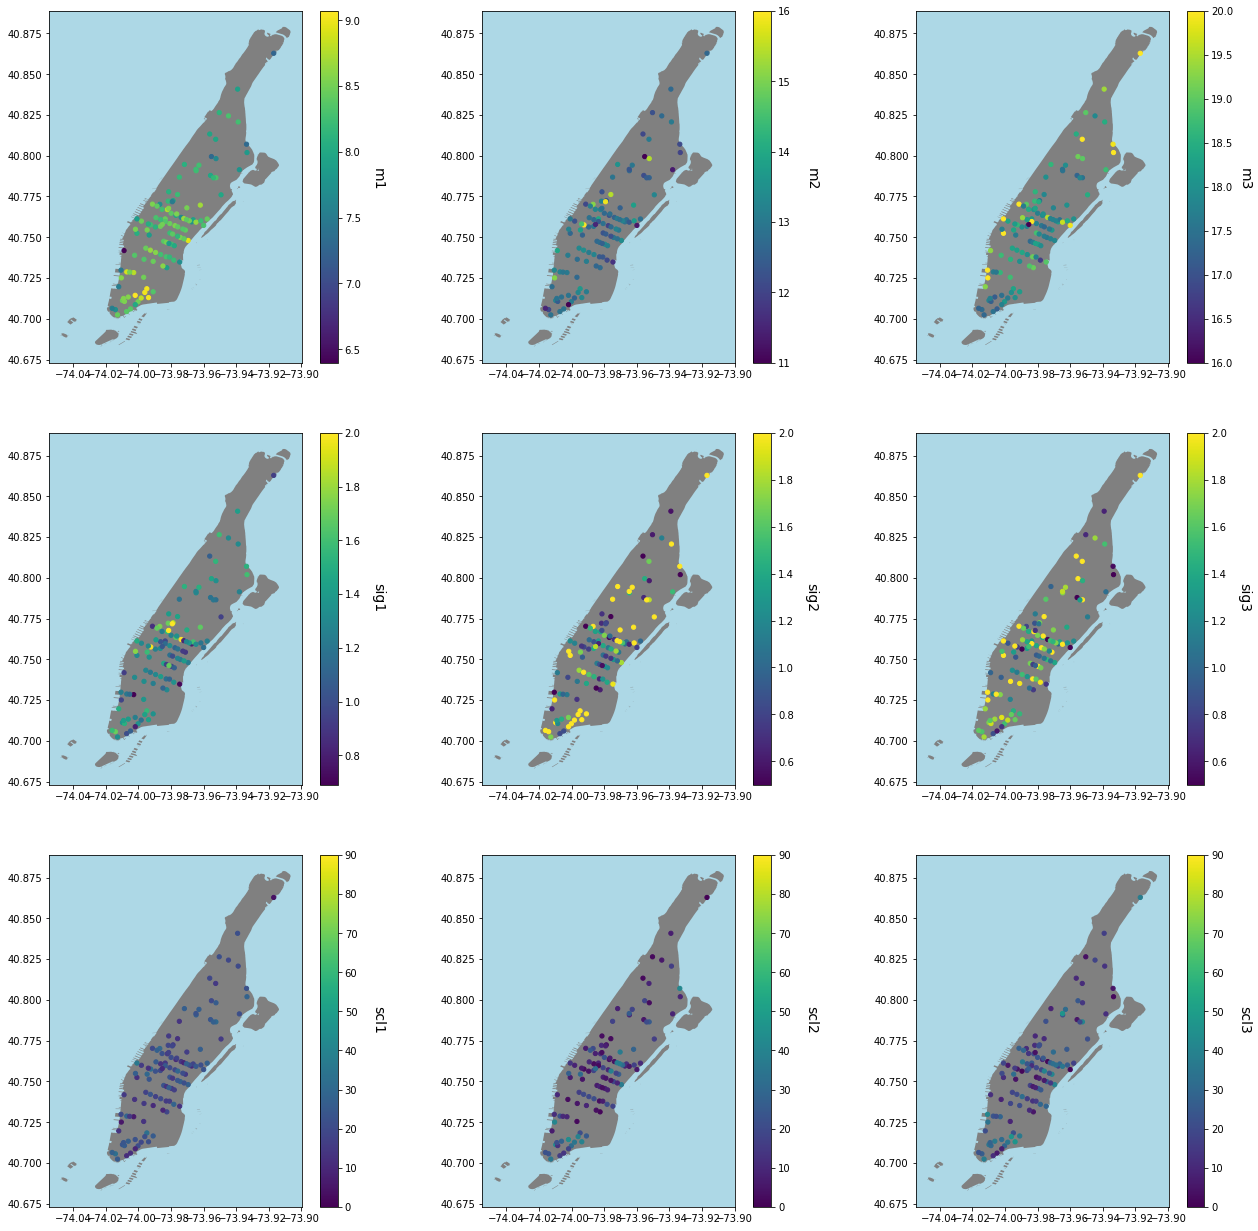

In [ ]:
# -- plot first nine parameters(mean, std, and scl) of 4 population fit
fig, axs = plt.subplots(3, 3, figsize=(22, 22))

cols = parr.columns
for row in range(3):
  for col in range(3):
    i = 3 * row + col
    ax = axs[row, col]
    boros.plot(color="grey", ax=ax)
    #parks_m.plot(color="orange", ax=ax)
    ax.set_facecolor("lightblue")
    sc = ax.scatter(parr["lon"], parr["lat"], s=18, c=parr[cols[i]])
    fig.colorbar(mappable=sc, ax=ax)
    if (row == 0 and col == 0):
      ax.text(1.3, 0.5, "m1", size=14, ha="center", rotation=-90, transform=ax.transAxes)   
    if (row == 0 and col == 1):
      ax.text(1.3, 0.5, "m2", size=14, ha="center", rotation=-90, transform=ax.transAxes)    
    if (row == 0 and col == 2):
      ax.text(1.3, 0.5, "m3", size=14, ha="center", rotation=-90, transform=ax.transAxes)  
    if (row == 1 and col == 0):
      ax.text(1.3, 0.5, "sig1", size=14, ha="center", rotation=-90, transform=ax.transAxes)   
    if (row == 1 and col == 1):
      ax.text(1.3, 0.5, "sig2", size=14, ha="center", rotation=-90, transform=ax.transAxes)    
    if (row == 1 and col == 2):
      ax.text(1.3, 0.5, "sig3", size=14, ha="center", rotation=-90, transform=ax.transAxes)  
    if (row == 2 and col == 0):
      ax.text(1.3, 0.5, "scl1", size=14, ha="center", rotation=-90, transform=ax.transAxes)
      sc.set_clim(0, 90)  
    if (row == 2 and col == 1):
      ax.text(1.3, 0.5, "scl2", size=14, ha="center", rotation=-90, transform=ax.transAxes)
      sc.set_clim(0, 90)       
    if (row == 2 and col == 2):
      ax.text(1.3, 0.5, "scl3", size=14, ha="center", rotation=-90, transform=ax.transAxes)
      sc.set_clim(0, 90)  

In [ ]:
parr

,m1,m2,m3,sd1,sd2,sd3,scl1,scl2,scl3,wamp,off,lat,lon,rstrant,parkarea,sratio,w_manhattan,r_manhattan,f
0,8.476099,13.872231,18.116819,0.976354,1.299100,1.372399,25.926155,16.290366,46.271962,0.004927,0.954666,40.761268,-73.983564,180,0.000000,0.451268,19861.575731,686.304649,0.466862
1,7.431659,15.188580,18.900633,1.569043,0.500000,0.804402,4.067507,0.746344,1.248451,0.000821,-0.051532,40.770207,-73.986869,8,0.000000,0.280794,3871.237562,1712.178205,0.404984
2,8.986561,13.590765,18.355688,1.542258,2.000000,1.428549,54.753768,30.349075,33.569916,0.005309,-0.094967,40.718427,-73.994830,201,58445.164287,0.687224,3115.066002,1024.629008,0.913270
3,8.305332,12.559779,17.531852,1.157092,1.860503,2.000000,19.322445,16.022023,25.870235,0.000840,0.126589,40.786516,-73.952456,36,19998.479164,0.709054,664.869474,2083.624285,2.931147
4,8.092578,12.930019,20.000000,1.298370,2.000000,2.000000,14.260991,9.510312,16.160903,0.006157,-0.065108,40.752424,-74.000899,10,27738.524376,0.625228,600.262988,114.241471,0.744221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,8.227331,12.662515,20.000000,1.067877,0.500000,2.000000,11.884143,2.944952,6.572555,0.006022,-0.044978,40.728600,-74.005356,75,45502.597890,0.319120,4789.079473,619.321194,0.360389
112,7.309079,12.149431,19.946670,1.515623,2.000000,0.577131,1.984760,3.712308,0.505734,0.000248,0.045705,40.807061,-73.933681,0,233456.280673,2.981183,204.270486,33.049144,3.463512
113,8.461564,12.830828,18.026471,1.246872,1.095039,1.364601,5.044572,2.339576,3.922614,0.000520,0.044570,40.761216,-73.957815,5,22530.378565,0.521808,4741.542367,1805.796279,0.720537
114,8.441229,12.875858,17.286319,1.334623,1.656824,1.793563,75.325907,99.890250,107.951338,0.003651,0.204601,40.702389,-74.012806,88,119851.579490,1.090045,17701.876761,426.143228,1.116286


# comparison of tourist component


In [ ]:


# -- read in the average weekend counts
fname = os.path.join("drive", "My Drive", "lwir", "data", "nycdot", 
                     "avg_weekend_ts.feather")
weekend = uf(pd.read_feather(fname)["avg_counts"].values, 8)

# -- extract just the counts from weekdays
camarr = camera.drop(columns=["cam_id", "lat", "lon"]).values

In [ ]:
# -- set indices of cameras that don't have 3-peak behavior
bind = [0, 5, 8, 11, 13, 19, 36, 45, 48, 51, 52, 60, 62, 63, 66, 67, 68, 69, 
        74, 79, 80, 81, 89, 93, 94, 98, 99, 103, 104, 106, 110, 113, 114, 115, 
        121, 125, 137, 138, 139, 146, 151]
camdf = camera[~camera.index.isin(bind)].copy()

In [ ]:
# -- define gaussian
def gauss(xarr, x0, sig, scl):
  """ Create a 1D Gaussian """
  
  amp = scl / (sig * np.sqrt(2.0 * np.pi))
  val = -0.5 * ((xarr - x0) / sig)**2
  
  return amp * np.exp(val)


# -- define the model
def pop_model(param, xval):

  # -- determine which model is being used from length of param array
  nparam = len(param)

  # -- 3 population model
  if nparam == 10:
    m1, m2, m3, sd1, sd2, sd3, scl1, scl2, scl3, off = param
    wamp = 0.0

  # -- 4 population model
  elif nparam == 11:
    m1, m2, m3, sd1, sd2, sd3, scl1, scl2, scl3, wamp, off = param

  # -- ill-defined param array
  else:
    print("Nparam must be 10 (3pop) or 11 (4pop) model!")
    return None

  model = gauss(xval, m1, sd1, scl1) + gauss(xval, m2, sd2, scl2) + \
    gauss(xval, m3, sd3, scl3) + wamp * wendvals + off

  return model


# -- define model error
def res(param, xval, yval):

  return yval - pop_model(param, xval)

In [ ]:
#4-population fit for average weekday counts for all cameras

# -- set inital guess
avgs  = [35, 47, 70] 
sigs  = [3, 3, 3]
scls  = [5, 5, 5]
off   = [0.5]
wamp = [6]
param = avgs + sigs + scls + wamp + off

# -- set fit and model parameters and 
wendvals = weekend
xval_final = np.arange(96)
bounds_lo = [24., 44., 64., 2.0, 2.0, 2.0, 0, 0, 0, 0, -np.inf]
bounds_hi = [44., 64., 80., 8., 8., 8., np.inf, np.inf, np.inf, np.inf, np.inf]

# -- optimize
plsq4 = [least_squares(res, param, bounds=(bounds_lo, bounds_hi), 
                       args=(xval_final, camarr[i])) for i in range(len(camarr))]

In [ ]:
#3-population fit for average weekday counts for all cameras

# -- set inital guess
avgs  = [35, 47, 70] 
sigs  = [3, 3, 3]
scls  = [5, 5, 5]
off   = [0.5]
param = avgs + sigs + scls + off

# -- set fit and model parameters and 
wendvals = weekend
xval_final = np.arange(96)
bounds_lo = [24., 44., 64., 2.0, 2.0, 2.0, 0, 0, 0, -np.inf]
bounds_hi = [44., 64., 80., 8., 8., 8., np.inf, np.inf, np.inf, np.inf]

# -- optimize
plsq3 = [least_squares(res, param, bounds=(bounds_lo, bounds_hi), 
                       args=(xval_final, camarr[i])) for i in range(len(camarr))]

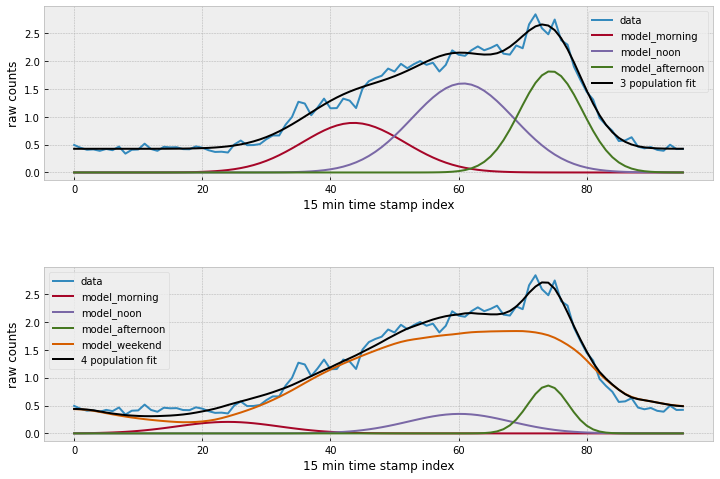

In [ ]:
plt.style.use("bmh")
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=[12, 8])
fig.subplots_adjust(hspace=0.5, wspace =0.3)

m1, m2, m3, sd1, sd2, sd3, scl1, scl2, scl3, off = plsq3[106]["x"]
model1 = gauss(xval_final, m1, sd1, scl1)
model2 = gauss(xval_final, m2, sd2, scl2)
model3 = gauss(xval_final, m3, sd3, scl3)
pdat = camarr[106]
off = off
plt.style.use("bmh")
fig = plt.subplot(2, 1, 1)
plt.plot(xval_final, camarr[106], label="data")

# plt.plot(resid, label="resid")
plt.plot(model1, label="model_morning")
plt.plot(model2, label="model_noon")
plt.plot(model3, label="model_afternoon")
plt.plot(model1 + model2 + model3 + off, "k", 
          label="3 population fit")

#ax.set_title("camarr index: {0}".format(i))
plt.xlabel("15 min time stamp index")
plt.ylabel("raw counts")
plt.legend()



m1, m2, m3, sd1, sd2, sd3, scl1, scl2, scl3, wamp, off = plsq4[106]["x"]
model1 = gauss(xval_final, m1, sd1, scl1)
model2 = gauss(xval_final, m2, sd2, scl2)
model3 = gauss(xval_final, m3, sd3, scl3)
model4 = wamp * wendvals
pdat = camarr[106]
off = off
plt.style.use("bmh")
fig = plt.subplot(2, 1, 2)
plt.plot(xval_final, camarr[106], label="data")

# plt.plot(resid, label="resid")
plt.plot(model1, label="model_morning")
plt.plot(model2, label="model_noon")
plt.plot(model3, label="model_afternoon")
plt.plot(uf(wamp * wendvals), label="model_weekend")
plt.plot(model1 + model2 + model3 + wamp * wendvals + off, "k", 
          label="4 population fit")

#ax.set_title("camarr index: {0}".format(i))
plt.xlabel("15 min time stamp index")
plt.ylabel("raw counts")
plt.legend()

rawfile = os.path.join("drive", "My Drive", "lwir", "output","figure4", "comparison of tourist component")
plt.savefig(rawfile)


In [ ]:
camera.iloc[106]

cam_id    988.000000
lat        40.719655
lon       -74.001842
0           0.493545
1           0.443390
             ...    
91          0.405173
92          0.389571
93          0.497752
94          0.420569
95          0.423118
Name: 106, Length: 99, dtype: float64

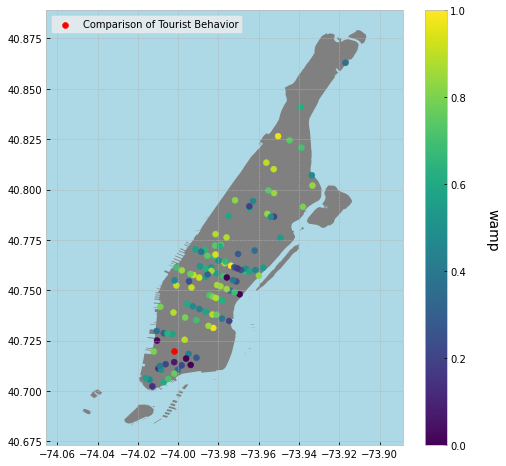

In [ ]:
# -- create a wamp plot of 4 population fit 
fig, ax = plt.subplots(figsize=[8, 8])
boros.plot(color="grey", ax=ax, legend=True)
#parks_m.plot(color="orange", ax=ax, legend=True)
sc = ax.scatter(parr["lon"], parr["lat"], c=parr["wamp"])
sc = ax.scatter(camera.iloc[106]["lon"], camera.iloc[106]["lat"], color = "red", label='Comparison of Tourist Behavior')
fig.colorbar(mappable=sc, ax=ax)
ax.legend(loc='upper left')
ax.set_facecolor("lightblue")
ax.axis("equal")
#ax.set_title("wamp of 4 population fit")
fig.text(0.9, 0.5, "wamp", ha="center", 
         va="center", rotation=-90, fontsize=14)


rawfile = os.path.join("drive", "My Drive", "lwir", "output","figure4", "wamp of tourist component")
plt.savefig(rawfile)